<a href="https://colab.research.google.com/github/jh941213/NLP/blob/main/00_Tensorflow_modeling(%EC%8B%A4%EC%8A%B5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
tf.__version__

'2.9.2'

## Tensorflow 모델 만드는 방법

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

### 1. Sequential API
- https://www.tensorflow.org/guide/keras/sequential_model?hl=ko

장점 : 단순하게 층을 쌓는 방식으로 쉽고 사용하기가 간단합니다.   
단점 : 다수의 입력(multi-input), 다수의 출력(multi-output)을 가진 모델 또는 층 간의 연결(concatenate)이나 덧셈(Add)과 같은 연산을 하는 모델을 구현하기에는 적합하지 않습니다. 이런 모델들의 구현은 Functional API를 사용해야 합니다.

In [ ]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers


In [ ]:
sequential_model = Sequential()

# 첫번째 레이어는 input shape 명시
sequential_model.add(Dense(64, input_shape=(784, )))
sequential_model.add(Dense(10, activation = 'softmax'))

sequential_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
sequential_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer = 'adam', metrics=['acc'])
sequential_model.fit(x_train, y_train, batch_size=64, epochs=5, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 5s 6ms/step - loss: 0.4181 - acc: 0.8817 - val_loss: 0.2955 - val_acc: 0.9155
Epoch 2/5
750/750 [==============================] - 3s 4ms/step - loss: 0.2977 - acc: 0.9165 - val_loss: 0.2750 - val_acc: 0.9238
Epoch 3/5
750/750 [==============================] - 2s 3ms/step - loss: 0.2837 - acc: 0.9201 - val_loss: 0.2786 - val_acc: 0.9236
Epoch 4/5
750/750 [==============================] - 2s 3ms/step - loss: 0.2755 - acc: 0.9228 - val_loss: 0.2816 - val_acc: 0.9217
Epoch 5/5
750/750 [==============================] - 2s 3ms/step - loss: 0.2711 - acc: 0.9243 - val_loss: 0.2738 - val_acc: 0.9284


In [ ]:
test_scores = sequential_model.evaluate(x_test, y_test, verbose=2)
print("Test loss: ", test_scores[0])
print("Test accuracy: ", test_scores[1])

313/313 - 0s - loss: 0.2824 - acc: 0.9216 - 405ms/epoch - 1ms/step
Test loss:  0.282391220331192
Test accuracy:  0.9215999841690063


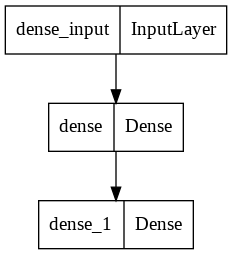

In [ ]:
tf.keras.utils.plot_model(sequential_model, to_file='sequential_model.png', )

### Functional API
- Functional API : https://www.tensorflow.org/guide/keras/functional?hl=ko
- Input : https://www.tensorflow.org/api_docs/python/tf/keras/Input
- Model : https://www.tensorflow.org/api_docs/python/tf/keras/Model 
    - Model groups layers into an object with training and inference features.

장점 : Sequential API로는 구현하기 어려운 복잡한 모델들을 구현할 수 있습니다.   
단점 : 입력의 크기(shape)를 명시한 입력층(Input layer)을 모델의 앞단에 정의해주어야 합니다.

Functional API로 모델을 생성하는 법
1. 입력노드를 생성한다. 
2. 입력노드가 레이어간 어떻게 이동하는 지를 그래프 그리듯 명시한다. 

In [ ]:
inputs = tf.keras.Input(shape=(784,)) # 입력노드 생성 

# layer 생성
dense = Dense(64, activation="relu")
x = dense(inputs)

# layer 생성
outputs = Dense(10, activation ='softmax')(x)

# Model 생성
model = tf.keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

In [ ]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


훈련, 평가 및 추론은 Sequential 모델과 같이 함수형 API를 사용하여 빌드된 모델에 대해 같은 방식으로 작동합니다.

In [ ]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=64, epochs=2, validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/2
750/750 [==============================] - 3s 3ms/step - loss: 0.3655 - accuracy: 0.9001 - val_loss: 0.2217 - val_accuracy: 0.9370
Epoch 2/2
750/750 [==============================] - 2s 3ms/step - loss: 0.1931 - accuracy: 0.9441 - val_loss: 0.1642 - val_accuracy: 0.9544
313/313 - 0s - loss: 0.1565 - accuracy: 0.9531 - 376ms/epoch - 1ms/step
Test loss: 0.15647469460964203
Test accuracy: 0.9531000256538391


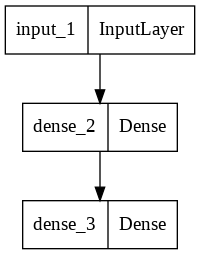

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', )

#### 같은 레이어 그래프를 사용하여 여러 모델 정의하기

함수형 API에서 모델은 레이어 그래프에 입력 및 출력을 지정하여 생성됩니다. 즉, 단일 레이어 그래프를 사용하여 여러 모델을 생성할 수 있습니다.

아래 예에서는 같은 레이어 스택을 사용하여 두 모델을 인스턴스화합니다. 이미지 입력을 16차원 벡터로 변환하는 encoder 모델과 훈련을 위한 엔드 투 엔드 autoencoder 모델입니다.

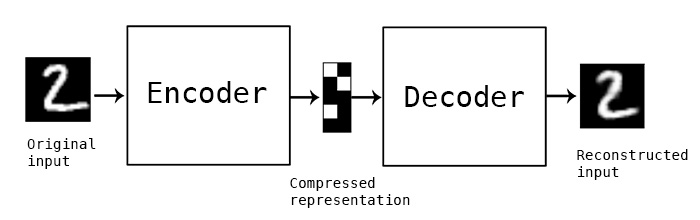

##### 참고 : autoencoder 
- 오토인코더(Autoencoder)는 아래의 그림과 같이 단순히 입력을 출력으로 복사하는 신경망
- 오토인코더는 위의 그림에서 볼 수 있듯이 항상 인코더(encoder)와 디코더(decoder), 두 부분으로 구성되어 있다.
    - 인코더(encoder) : 인지 네트워크(recognition network)라고도 하며, 입력을 내부 표현으로 변환한다.
    - 디코더(decoder) : 생성 네트워크(generative nework)라고도 하며, 내부 표현을 출력으로 변환한다.


일단 인코더 부분만 만들어봅시다. 

In [ ]:
# 인코더

encoder_input = tf.keras.Input(shape=(28, 28, 1), name="img")
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = tf.keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 32)         0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 32)          9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 16)          4624      
                                                           

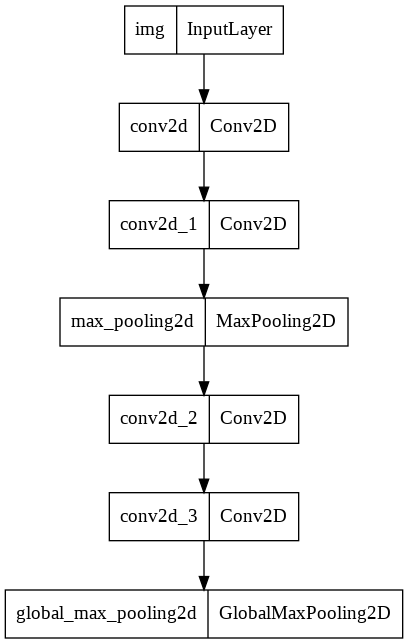

In [ ]:
tf.keras.utils.plot_model(encoder, to_file='encoder.png', )

이번에는 인코더 out을 사용해서 이미지를 생성하는 디코더 모델을 만들어봅시다. 

In [ ]:
x = layers.Reshape((4, 4, 1))(encoder_output)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

In [ ]:
decoder = tf.keras.Model(encoder_output, decoder_output, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 16)]              0         
                                                                 
 reshape (Reshape)           (None, 4, 4, 1)           0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 6, 6, 16)         160       
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 8, 8, 32)         4640      
 ranspose)                                                       
                                                                 
 up_sampling2d (UpSampling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                           

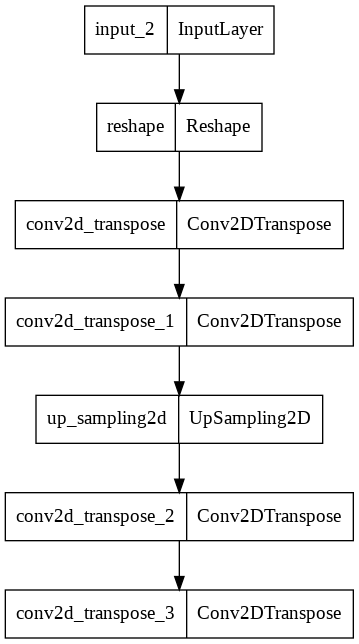

In [ ]:
tf.keras.utils.plot_model(decoder, to_file='decoder.png', )

인코더와 디코더를 연결한 autoencoder를 만들어봅시다. 

In [ ]:
# autoencoder 
autoencoder = tf.keras.Model(encoder_input, decoder_output, name="autoencoder")
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 32)         0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 32)          9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 16)          4624      
                                                       

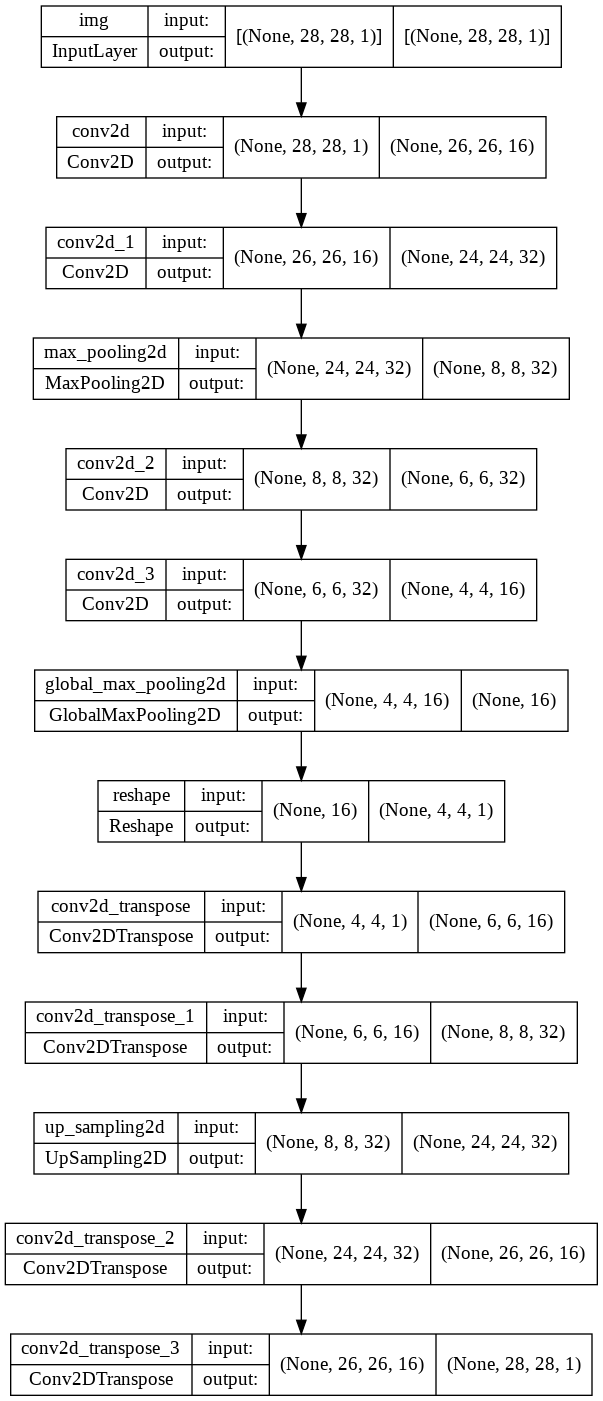

In [ ]:
tf.keras.utils.plot_model(autoencoder, to_file='autoencoder.png', show_shapes=True)

#### 복잡한 그래프 다루기 : 다중입출력

함수형 API를 사용하면 다중 입력 및 출력을 쉽게 조작할 수 있습니다

예를 들어 우선 순위별로 사용자 지정 발급 티켓 순위를 매기고 올바른 부서로 라우팅하는 시스템을 구축하는 경우 모델에는 세 가지 입력이 있습니다.

- 티켓의 제목 (텍스트 입력)
- 티켓의 본문 (텍스트 입력)
- 사용자가 추가 한 모든 태그 (범주 입력)


이 모델에는 두 가지 출력이 있습니다.
- 0과 1 사이의 우선 순위 점수 (스칼라 시그 모이 드 출력)
- 티켓을 처리해야하는 부서 (부서 세트에 대한 softmax 출력)

함수형 API를 사용하여 이 모델을 몇 줄로 빌드할 수 있습니다

In [ ]:
num_tags = 12  # Number of unique issue tags
num_words = 10000  # Size of vocabulary obtained when preprocessing text data
num_departments = 4  # Number of departments for predictions

title_input = tf.keras.Input(
    shape=(None,), name="title"
)  # Variable-length sequence of ints
body_input = tf.keras.Input(shape=(None,), name="body")  # Variable-length sequence of ints
tags_input = tf.keras.Input(
    shape=(num_tags,), name="tags"
)  # Binary vectors of size `num_tags`

# Embed each word in the title into a 64-dimensional vector
title_features = layers.Embedding(num_words, 64)(title_input)
# Embed each word in the text into a 64-dimensional vector
body_features = layers.Embedding(num_words, 64)(body_input)

# Reduce sequence of embedded words in the title into a single 128-dimensional vector
title_features = layers.LSTM(128)(title_features)
# Reduce sequence of embedded words in the body into a single 32-dimensional vector
body_features = layers.LSTM(32)(body_features)

# Merge all available features into a single large vector via concatenation
x = layers.concatenate([title_features, body_features, tags_input])

# Stick a logistic regression for priority prediction on top of the features
priority_pred = layers.Dense(1, name="priority")(x)
# Stick a department classifier on top of the features
department_pred = layers.Dense(num_departments, name="department")(x)

# Instantiate an end-to-end model predicting both priority and department
model = tf.keras.Model(
    inputs=[title_input, body_input, tags_input],
    outputs=[priority_pred, department_pred],
)

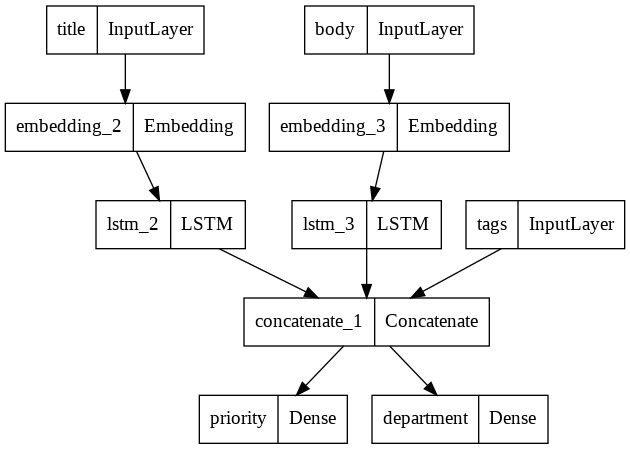

In [ ]:
tf.keras.utils.plot_model(model, "multi_input_and_output_model.png")

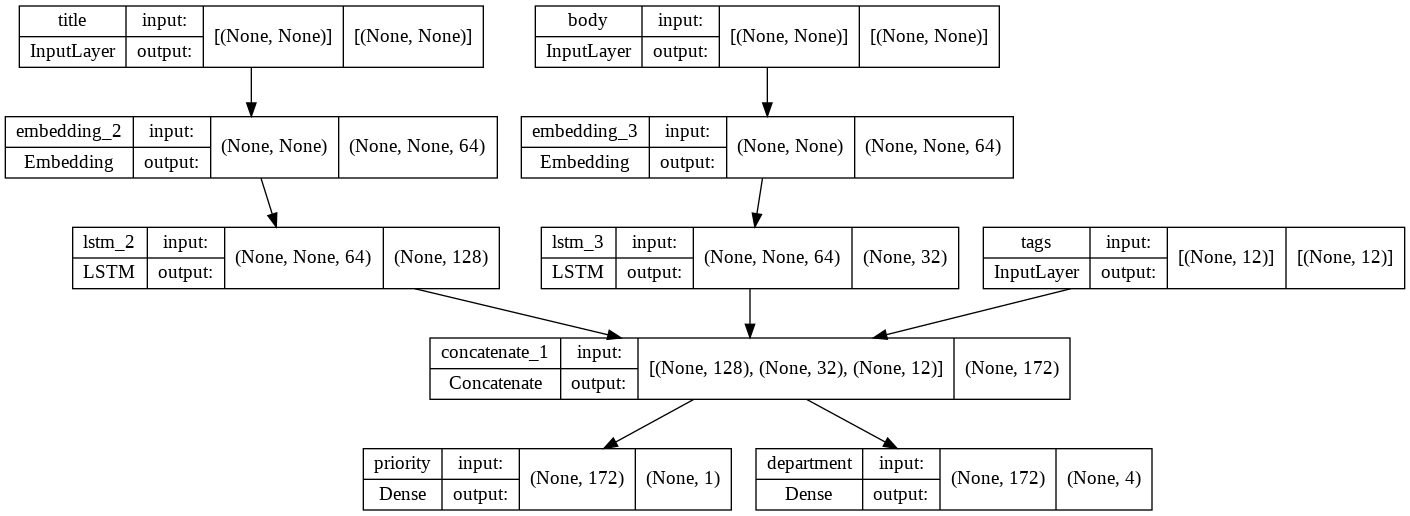

In [ ]:
tf.keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

이 모델을 컴파일 할 때 각 출력에 서로 다른 손실을 할당 할 수 있습니다. 각 손실에 다른 가중치를 할당하여 총 교육 손실에 대한 기여도를 조정할 수도 있습니다. 

출력 레이어의 이름이 다르므로 손실을 다음과 같이 지정할 수도 있습니다.

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(1e-3),
    loss={
        "priority": tf.keras.losses.BinaryCrossentropy(from_logits=True),
        "department": tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    },
    loss_weights=[1.0, 0.2],
)

In [ ]:
# Dummy input data
title_data = np.random.randint(num_words, size=(1280, 10))
body_data = np.random.randint(num_words, size=(1280, 100))
tags_data = np.random.randint(2, size=(1280, num_tags)).astype("float32")

# Dummy target data
priority_targets = np.random.random(size=(1280, 1))
dept_targets = np.random.randint(2, size=(1280, num_departments))

model.fit(
    {"title": title_data, "body": body_data, "tags": tags_data},
    {"priority": priority_targets, "department": dept_targets},
    epochs=2,
    batch_size=32,
)

Epoch 1/2
40/40 [==============================] - 6s 52ms/step - loss: 1.3164 - priority_loss: 0.7055 - department_loss: 3.0544
Epoch 2/2
40/40 [==============================] - 2s 49ms/step - loss: 1.2972 - priority_loss: 0.6987 - department_loss: 2.9925


### 문제1. 아래 그림과 같은 모델을 Functional API로 만들어보세요. 

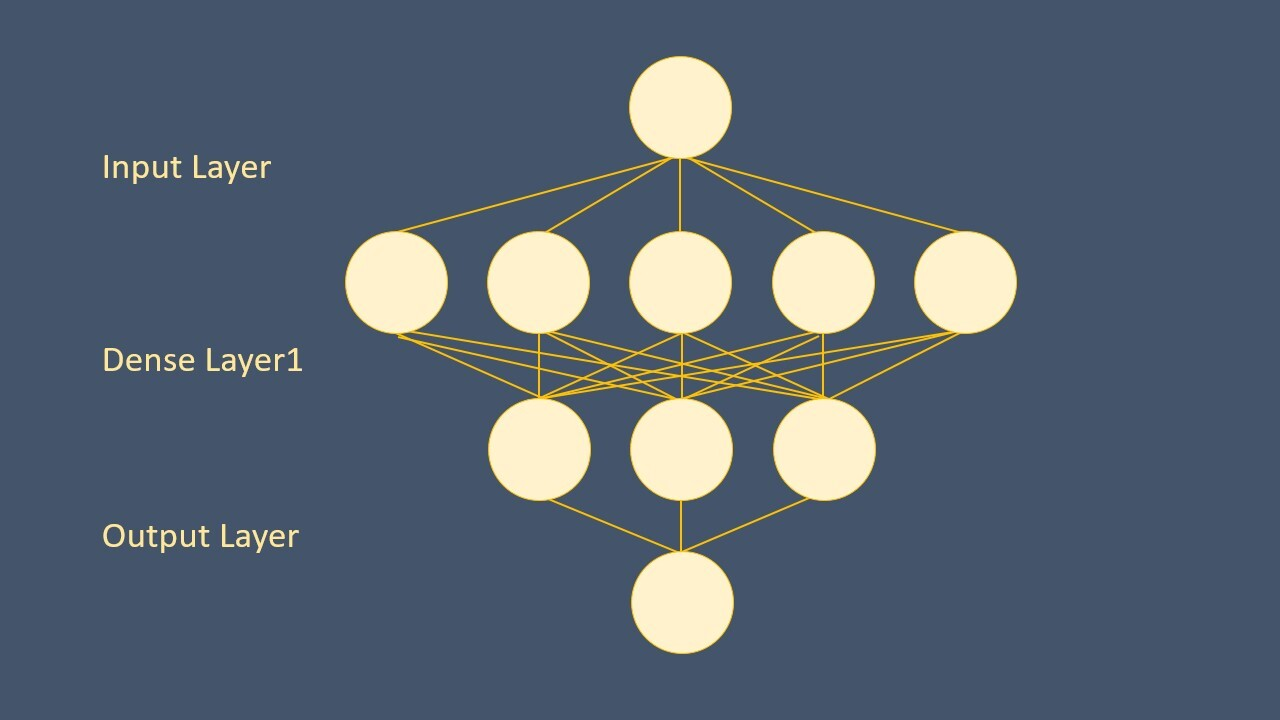

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_18 (Dense)            (None, 5)                 10        
                                                                 
 dense_19 (Dense)            (None, 3)                 18        
                                                                 
 dense_20 (Dense)            (None, 1)                 4         
                                                                 
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________


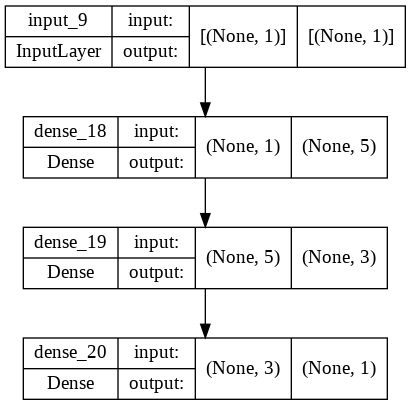

### 문제2. 아래 그래프를 보고 동일한 모델을 만들어보세요. 

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 embedding_4 (Embedding)        (None, 100, 512)     5120000     ['input_6[0][0]']                
                                                                                                  
 lstm_2 (LSTM)                  (None, 32)           69760       ['embedding_4[0][0]']            
                                                                                                  
 aux_input (InputLayer)         [(None, 5)]          0           []                               
                                                                                            

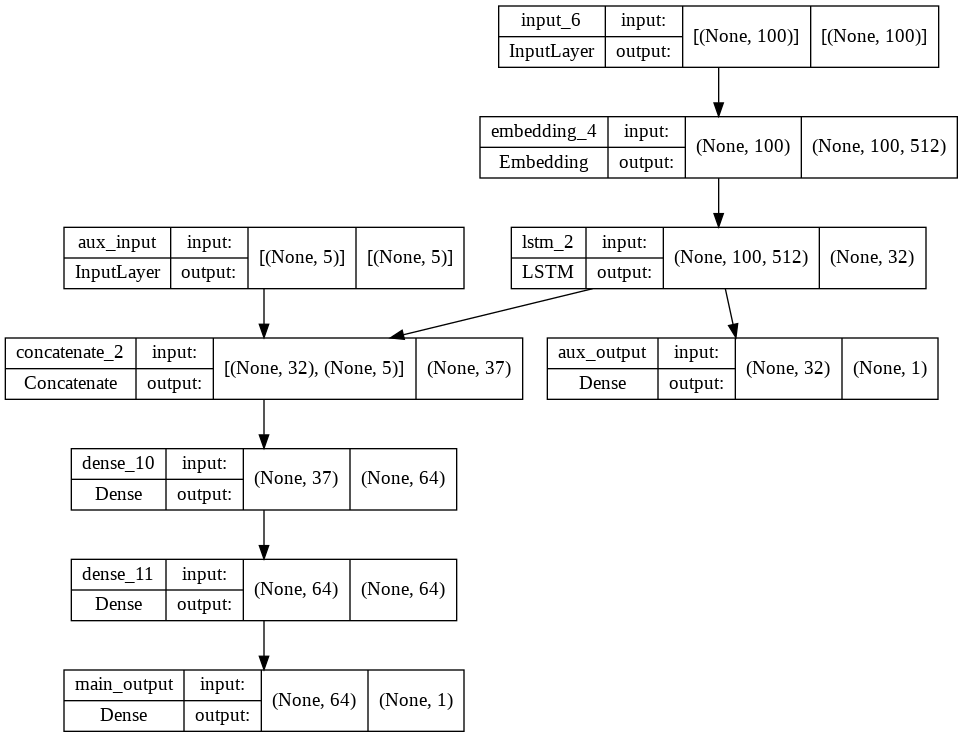

In [ ]:
tf.keras.utils.plot_model(model, "model.png", show_shapes=True)

### 문제3. 아래 그래프와 같은 Resnet을 Functional API를 이용해서 구현해보세요. 

Model: "toy_resnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_25 (Conv2D)             (None, 30, 30, 32)   896         ['img[0][0]']                    
                                                                                                  
 conv2d_26 (Conv2D)             (None, 28, 28, 64)   18496       ['conv2d_25[0][0]']              
                                                                                                  
 max_pooling2d_5 (MaxPooling2D)  (None, 9, 9, 64)    0           ['conv2d_26[0][0]']              
                                                                                         

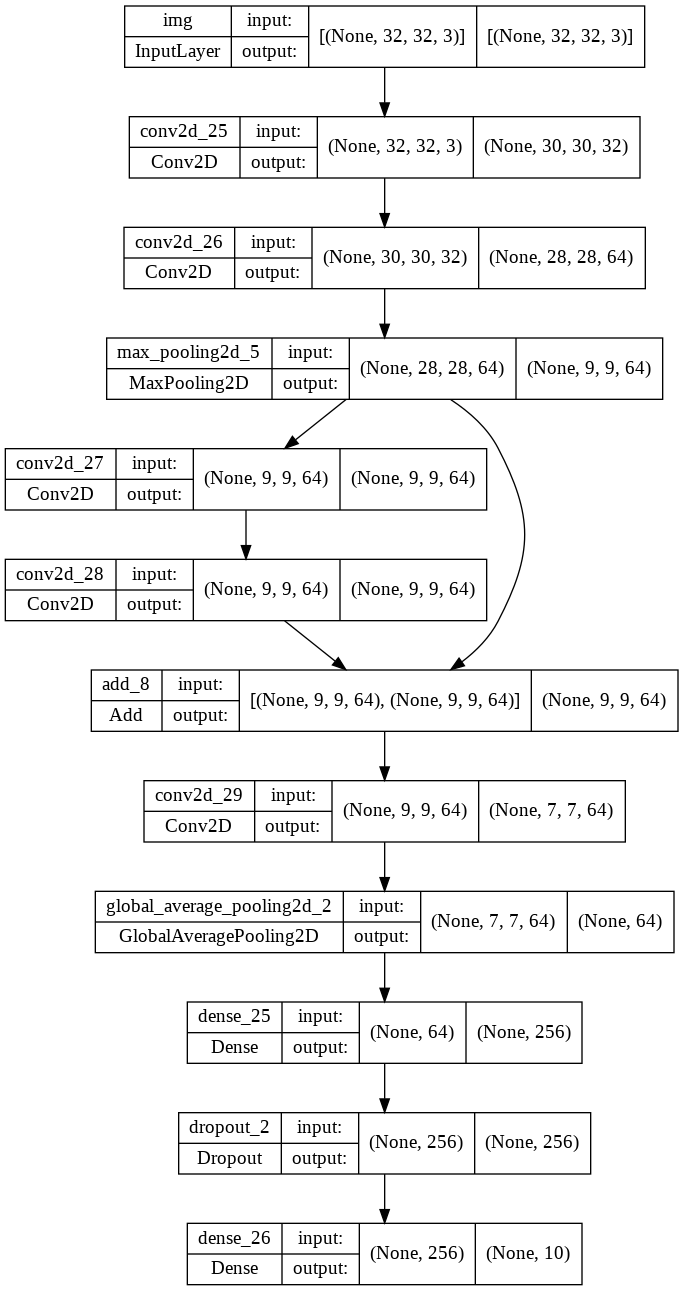

In [ ]:
tf.keras.utils.plot_model(model, "model.png", show_shapes=True)

### 3. Sub Class

 - `__init__(self)`는 객체가 생성될 때 호출되는 함수
 - call(self)는 객체 변수를 실행할 때 호출되는 함수

장점 : Functional API로도 구현할 수 없는 모델들조차 구현이 가능합니다.   
단점 : 객체 지향 프로그래밍(Object-oriented programming)에 익숙해야 하므로 코드 사용이 가장 까다롭습니다.

[방법1] tf.keras.Layer를 상속받아 custom layer만들기

In [ ]:
class MyLayer(tf.keras.layers.Layer):
    def __init__(self):
        super(MyLayer, self).__init__()
        self.d1 = tf.keras.layers.Dense(64, activation = 'relu')
        self.d2 = tf.keras.layers.Dense(10, activation = 'softmax')
    
    def call(self, x):
        x = self.d1(x)
        return self.d2(x)
        

In [ ]:
inputs = tf.keras.Input(shape=(784,)) # 입력노드 생성 

# layer 생성
outputs = MyLayer()(inputs)

# Model 생성
model = tf.keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

In [ ]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 my_layer (MyLayer)          (None, 10)                50890     
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=64, epochs=2, validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

[방법2]tf.keras.Model을 상속받아 custom Model 만들기

In [ ]:
# 혹시 이미 그려둔 그래프가 있다면 clear
tf.keras.backend.clear_session()

class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.d1 = tf.keras.layers.Dense(64, activation='relu')
    self.d2 = tf.keras.layers.Dense(10, activation='softmax')

  def call(self, input):
    x = self.d1(input)
    return self.d2(x)



model = MyModel()

In [ ]:

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=64, epochs=2, validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/2
750/750 [==============================] - 4s 4ms/step - loss: 0.3702 - accuracy: 0.8982 - val_loss: 0.2256 - val_accuracy: 0.9331
Epoch 2/2
750/750 [==============================] - 3s 4ms/step - loss: 0.1982 - accuracy: 0.9411 - val_loss: 0.1701 - val_accuracy: 0.9517
313/313 - 0s - loss: 0.1692 - accuracy: 0.9501 - 439ms/epoch - 1ms/step
Test loss: 0.16917608678340912
Test accuracy: 0.9501000046730042


In [ ]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               multiple                  50240     
                                                                 
 dense_1 (Dense)             multiple                  650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = MyModel()
inputs = tf.keras.Input(shape=(784,)) # 입력노드 생성 
model(inputs)

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'my_model_1')>

참고
- https://www.tensorflow.org/guide/keras/functional?hl=ko#%EB%A0%88%EC%9D%B4%EC%96%B4%EC%99%80_%EB%A7%88%EC%B0%AC%EA%B0%80%EC%A7%80%EB%A1%9C_%EB%AA%A8%EB%93%A0_%EB%AA%A8%EB%8D%B8%EC%9D%80_callable%EC%9E%85%EB%8B%88%EB%8B%A4

- https://ebbnflow.tistory.com/128